# RNN

简单 RNN的调用方法有torch.nn.RNNCell() 和 torch.nn.RNN()，区别在于 RNNCell() 只能接受序列中单步的输入，且必须传入隐藏状态，而 RNN() 可以接受一个序列的输入，默认会传入全 0 的隐藏状态，也可以自己申明隐藏状态传入。



**RNNCell**的参数只有 `input_size`，`hidden_size`，bias 以及 nonlinearity

## 基础

### RNNCell()案例

In [1]:
import torch
from torch.autograd import Variable
from torch import nn

#### 定义一个单步 rnn

In [2]:
rnn_single = nn.RNNCell(input_size=100, hidden_size=200)

#### 访问其中的参数

In [3]:
rnn_single.weight_hh

Parameter containing:
tensor([[-0.0121, -0.0071, -0.0228,  ...,  0.0465, -0.0312,  0.0135],
        [-0.0139, -0.0394,  0.0060,  ..., -0.0090, -0.0230,  0.0278],
        [-0.0486,  0.0101,  0.0220,  ..., -0.0468, -0.0456, -0.0121],
        ...,
        [-0.0696,  0.0255, -0.0510,  ...,  0.0203, -0.0122, -0.0079],
        [ 0.0147,  0.0699,  0.0101,  ..., -0.0684, -0.0207, -0.0533],
        [-0.0519, -0.0654,  0.0045,  ..., -0.0364,  0.0428,  0.0486]],
       requires_grad=True)

#### 构造一个序列，长为 6，batch 是 5， 特征是 100

In [5]:
x = Variable(torch.randn(6, 5, 100)) # 这是 rnn 的输入格式

#### 定义初始记忆状态

In [6]:
h_t = Variable(torch.zeros(5, 200))

#### 传入 rnn

In [7]:
out = []
for i in range(6): # 通过循环 6 次作用在整个序列上
    h_t = rnn_single(x[i], h_t)
    out.append(h_t)

In [8]:
h_t

tensor([[ 0.2822,  0.0848,  0.1522, -0.4652, -0.1371,  0.1180, -0.3615,  0.4051,
          0.3760,  0.3544,  0.5156,  0.0632, -0.7069,  0.2888,  0.6114, -0.0282,
          0.3294,  0.2965, -0.3887,  0.1540, -0.1659,  0.3253,  0.2786,  0.0556,
          0.2865,  0.1024,  0.0627,  0.2721,  0.1959,  0.0791,  0.7508,  0.4958,
         -0.2087,  0.3290,  0.1109,  0.2379,  0.0406,  0.5728,  0.0366,  0.2063,
         -0.8902,  0.6519,  0.5078, -0.0471, -0.3245, -0.4311, -0.5556, -0.3069,
         -0.6905, -0.2682,  0.4329,  0.1502, -0.3159, -0.6242,  0.0510,  0.3960,
          0.0727,  0.3489, -0.3252,  0.1135, -0.6984, -0.6146, -0.0108, -0.4698,
          0.1797, -0.9134,  0.5405, -0.0921, -0.3405,  0.4079,  0.2302, -0.1363,
          0.2458,  0.0834, -0.4328, -0.0330, -0.4659,  0.1715, -0.2625,  0.2477,
          0.0996,  0.1955,  0.6957,  0.6785,  0.6017, -0.0793,  0.0492, -0.6932,
          0.7858,  0.0315,  0.1706,  0.3420,  0.3327, -0.3839, -0.4467,  0.3935,
         -0.1903,  0.1228, -

In [9]:
len(out)

6

In [10]:
out[0].shape

torch.Size([5, 200])

可以看到经过了 rnn 之后，隐藏状态的值已经被改变了，因为网络记忆了序列中的信息，同时输出 6 个结果

### RNN()案例

**RNN()**里面的参数有

`input_size` 表示输入  𝑥𝑡  的特征维度

`hidden_size` 表示输出的特征维度

num_layers 表示网络的层数

nonlinearity 表示选用的非线性激活函数，默认是 'tanh'

bias 表示是否使用偏置，默认使用

batch_first 表示输入数据的形式，默认是 False，就是这样形式，(seq, batch, feature)，也就是将序列长度放在第一位，batch 放在第二位

dropout 表示是否在输出层应用 dropout

bidirectional 表示是否使用双向的 rnn，默认是 False

In [11]:
rnn_seq = nn.RNN(100, 200)

#### 访问其中的参数

In [12]:
rnn_seq.weight_hh_l0

Parameter containing:
tensor([[-0.0190, -0.0555, -0.0240,  ..., -0.0103, -0.0467, -0.0310],
        [-0.0576, -0.0082, -0.0046,  ...,  0.0611,  0.0499, -0.0321],
        [-0.0527, -0.0570,  0.0486,  ..., -0.0112,  0.0460, -0.0653],
        ...,
        [-0.0211, -0.0066, -0.0015,  ...,  0.0295, -0.0639,  0.0579],
        [-0.0266,  0.0396,  0.0219,  ...,  0.0248, -0.0524, -0.0080],
        [ 0.0664, -0.0662, -0.0658,  ...,  0.0141, -0.0303, -0.0100]],
       requires_grad=True)

In [13]:
out, h_t = rnn_seq(x) # 使用默认的全 0 隐藏状态

In [14]:
h_t

tensor([[[ 2.9642e-01, -1.7094e-01,  7.2426e-01, -6.0682e-01, -5.3764e-01,
           9.4040e-02, -5.0761e-01, -5.1416e-01, -6.6363e-01, -6.5439e-01,
          -6.9378e-01,  1.6287e-01,  1.1676e-02, -1.7018e-01,  7.2218e-02,
          -1.1706e-01,  5.7400e-01,  3.0677e-01, -4.8232e-01, -2.4516e-01,
          -3.2704e-01,  6.3920e-01,  3.1933e-01, -1.7153e-01,  5.4851e-01,
           1.7556e-01,  5.5979e-01,  4.8983e-01, -6.0952e-01,  5.5983e-01,
          -4.3169e-01, -3.0951e-01,  3.2036e-01,  3.0631e-01,  6.6712e-01,
           2.1856e-01,  5.4611e-01,  5.2666e-01, -4.1914e-02, -6.8725e-02,
          -9.6843e-02,  2.7297e-01,  7.3609e-01,  1.8870e-01, -2.4792e-01,
          -4.0301e-01,  2.1420e-01, -3.2498e-01,  1.5485e-01,  3.9371e-01,
          -3.2430e-01, -2.6223e-01, -3.8965e-01,  5.6082e-01,  5.9374e-01,
           1.4301e-01,  1.6342e-01, -2.0225e-01, -2.1086e-01, -4.3907e-01,
          -6.6137e-01, -8.2954e-01,  6.0664e-02,  6.0486e-01,  5.9656e-01,
          -4.6580e-01, -4

In [15]:
len(out)

6

这里的 h_t 是网络最后的隐藏状态，网络也输出了 6 个结果

#### 自己定义初始的隐藏状态

In [16]:
h_0 = Variable(torch.randn(1, 5, 200))

这里的隐藏状态的大小有三个维度，分别是 (num_layers * num_direction, batch, hidden_size)

In [17]:
out, h_t = rnn_seq(x, h_0)

In [18]:
h_t

tensor([[[ 2.8493e-01, -1.9340e-01,  7.2844e-01, -6.1514e-01, -5.3125e-01,
           8.8288e-02, -5.0952e-01, -5.1080e-01, -6.6997e-01, -6.5188e-01,
          -6.8858e-01,  1.7600e-01,  1.9313e-02, -1.6458e-01,  6.1695e-02,
          -1.4630e-01,  5.7672e-01,  2.9598e-01, -4.7717e-01, -2.1179e-01,
          -3.2338e-01,  6.3271e-01,  3.1637e-01, -1.7077e-01,  5.5456e-01,
           1.8508e-01,  5.6378e-01,  4.9860e-01, -6.2378e-01,  5.5658e-01,
          -4.3625e-01, -3.0986e-01,  3.1886e-01,  2.8439e-01,  6.6789e-01,
           2.0865e-01,  5.6127e-01,  5.1984e-01, -5.7674e-02, -9.0306e-02,
          -1.1643e-01,  2.9081e-01,  7.4512e-01,  1.8486e-01, -2.3288e-01,
          -3.8833e-01,  2.0207e-01, -3.3573e-01,  1.7750e-01,  4.0672e-01,
          -3.3296e-01, -2.6738e-01, -3.9195e-01,  5.5831e-01,  5.9904e-01,
           1.3076e-01,  1.4749e-01, -2.0369e-01, -2.1943e-01, -4.4052e-01,
          -6.7430e-01, -8.2514e-01,  5.3464e-02,  6.1838e-01,  5.8935e-01,
          -4.7104e-01, -4

In [19]:
out.shape

torch.Size([6, 5, 200])

同时输出的结果也是 (seq, batch, feature)

一般情况下我们都是用 `nn.RNN()` 而不是 `nn.RNNCell()`，因为 `nn.RNN()` 能够避免我们手动写循环，非常方便，同时如果不特别说明，我们也会选择使用默认的全 0 初始化隐藏状态

In [ ]:
rnn_seq = nn.RNN(100, 200)

## LSTM

![](https://ws1.sinaimg.cn/large/006tKfTcly1fmt9qj3uhmj30iz07ct90.jpg)

LSTM 和基本 RNN 参数相同，他也有 `nn.LSTMCell()` 和 `nn.LSTM()` 两种形式，跟前面讲的都是相同的

In [58]:
lstm_seq = nn.LSTM(50, 100, num_layers=2) # 输入维度 100，输出 200，两层

In [80]:
lstm_seq.weight_hh_l0 # 第一层的 h_t 权重

Parameter containing:
1.00000e-02 *
 3.8420  5.7387  6.1351  ...   1.2680  0.9890  1.3037
-4.2301  6.8294 -4.8627  ...  -6.4147  4.3015  8.4103
 9.4411  5.0195  9.8620  ...  -1.6096  9.2516 -0.6941
          ...             ⋱             ...          
 1.2930 -1.3300 -0.9311  ...  -6.0891 -0.7164  3.9578
 9.0435  2.4674  9.4107  ...  -3.3822 -3.9773 -3.0685
-4.2039 -8.2992 -3.3605  ...   2.2875  8.2163 -9.3277
[torch.FloatTensor of size 400x100]

**小练习：想想为什么这个系数的大小是 (400, 100)**

In [59]:
lstm_input = Variable(torch.randn(10, 3, 50)) # 序列 10，batch 是 3，输入维度 50

In [64]:
out, (h, c) = lstm_seq(lstm_input) # 使用默认的全 0 隐藏状态

注意这里 LSTM 输出的隐藏状态有两个，h 和 c，就是上图中的每个 cell 之间的两个箭头，这两个隐藏状态的大小都是相同的，(num_layers * direction, batch, feature)

In [66]:
h.shape # 两层，Batch 是 3，特征是 100

torch.Size([2, 3, 100])

In [67]:
c.shape

torch.Size([2, 3, 100])

In [61]:
out.shape

torch.Size([10, 3, 100])

我们可以不使用默认的隐藏状态，这是需要传入两个张量

In [68]:
h_init = Variable(torch.randn(2, 3, 100))
c_init = Variable(torch.randn(2, 3, 100))

In [69]:
out, (h, c) = lstm_seq(lstm_input, (h_init, c_init))

In [70]:
h.shape

torch.Size([2, 3, 100])

In [71]:
c.shape

torch.Size([2, 3, 100])

In [72]:
out.shape

torch.Size([10, 3, 100])

## GRU
![](https://ws3.sinaimg.cn/large/006tKfTcly1fmtaj38y9sj30io06bmxc.jpg)

GRU 和前面讲的这两个是同样的道理，就不再细说，还是演示一下例子

In [73]:
gru_seq = nn.GRU(10, 20)
gru_input = Variable(torch.randn(3, 32, 10))

out, h = gru_seq(gru_input)

In [76]:
gru_seq.weight_hh_l0

Parameter containing:
 0.0766 -0.0548 -0.2008  ...  -0.0250 -0.1819  0.1453
-0.1676  0.1622  0.0417  ...   0.1905 -0.0071 -0.1038
 0.0444 -0.1516  0.2194  ...  -0.0009  0.0771  0.0476
          ...             ⋱             ...          
 0.1698 -0.1707  0.0340  ...  -0.1315  0.1278  0.0946
 0.1936  0.1369 -0.0694  ...  -0.0667  0.0429  0.1322
 0.0870 -0.1884  0.1732  ...  -0.1423 -0.1723  0.2147
[torch.FloatTensor of size 60x20]

In [75]:
h.shape

torch.Size([1, 32, 20])

In [74]:
out.shape

torch.Size([3, 32, 20])

# RNN 做图像分类

用 mnist 手写字体的例子来展示一下如何用 RNN 做图像分类，但是这种方法并不是主流

对于一张手写字体的图片，其大小是 28 * 28，我们可以将其看做是一个长为 28 的序列，每个序列的特征都是 28，也就是

![](https://ws4.sinaimg.cn/large/006tKfTcly1fmu7d0byfkj30n60djdg5.jpg)

这样我们解决了输入序列的问题，对于输出序列怎么办呢？其实非常简单，虽然我们的输出是一个序列，但是我们只需要保留其中一个作为输出结果就可以了，这样的话肯定保留最后一个结果是最好的，因为最后一个结果有前面所有序列的信息，就像下面这样

![](https://ws3.sinaimg.cn/large/006tKfTcly1fmu7fpqri0j30c407yjr8.jpg)

In [1]:
import sys
sys.path.append('..')

import torch
from torch.autograd import Variable
from torch import nn
from torch.utils.data import DataLoader

from torchvision import transforms as tfs
from torchvision.datasets import MNIST

In [2]:
# 定义数据
data_tf = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize([0.5], [0.5]) # 标准化
])

train_set = MNIST('./data', train=True, transform=data_tf)
test_set = MNIST('./data', train=False, transform=data_tf)

train_data = DataLoader(train_set, 64, True, num_workers=4)
test_data = DataLoader(test_set, 128, False, num_workers=4)

In [3]:
# 定义模型
class rnn_classify(nn.Module):
    def __init__(self, in_feature=28, hidden_feature=100, num_class=10, num_layers=2):
        super(rnn_classify, self).__init__()
        self.rnn = nn.LSTM(in_feature, hidden_feature, num_layers) # 使用两层 lstm
        self.classifier = nn.Linear(hidden_feature, num_class) # 将最后一个 rnn 的输出使用全连接得到最后的分类结果
        
    def forward(self, x):
        '''
        x 大小为 (batch, 1, 28, 28)，所以我们需要将其转换成 RNN 的输入形式，即 (28, batch, 28)
        '''
        x = x.squeeze() # 去掉 (batch, 1, 28, 28) 中的 1，变成 (batch, 28, 28)
        x = x.permute(2, 0, 1) # 将最后一维放到第一维，变成 (28, batch, 28)
        out, _ = self.rnn(x) # 使用默认的隐藏状态，得到的 out 是 (28, batch, hidden_feature)
        out = out[-1, :, :] # 取序列中的最后一个，大小是 (batch, hidden_feature)
        out = self.classifier(out) # 得到分类结果
        return out

In [4]:
net = rnn_classify()
criterion = nn.CrossEntropyLoss()
optimzier = torch.optim.Adadelta(net.parameters(), 1e-1)

In [5]:
# 开始训练
from utils import train
train(net, train_data, test_data, 10, optimzier, criterion)

Epoch 0. Train Loss: 1.858605, Train Acc: 0.318347, Valid Loss: 1.147508, Valid Acc: 0.578125, Time 00:00:09
Epoch 1. Train Loss: 0.503072, Train Acc: 0.848514, Valid Loss: 0.300552, Valid Acc: 0.912579, Time 00:00:09
Epoch 2. Train Loss: 0.224762, Train Acc: 0.934785, Valid Loss: 0.176321, Valid Acc: 0.946499, Time 00:00:09
Epoch 3. Train Loss: 0.157010, Train Acc: 0.953392, Valid Loss: 0.155280, Valid Acc: 0.954015, Time 00:00:09
Epoch 4. Train Loss: 0.125926, Train Acc: 0.962137, Valid Loss: 0.105295, Valid Acc: 0.969640, Time 00:00:09
Epoch 5. Train Loss: 0.104938, Train Acc: 0.968450, Valid Loss: 0.091477, Valid Acc: 0.972805, Time 00:00:10
Epoch 6. Train Loss: 0.089124, Train Acc: 0.973481, Valid Loss: 0.104799, Valid Acc: 0.969343, Time 00:00:09
Epoch 7. Train Loss: 0.077920, Train Acc: 0.976679, Valid Loss: 0.084242, Valid Acc: 0.976661, Time 00:00:10
Epoch 8. Train Loss: 0.070259, Train Acc: 0.978795, Valid Loss: 0.078536, Valid Acc: 0.977749, Time 00:00:09
Epoch 9. Train Loss

可以看到，训练 10 次在简单的 mnist 数据集上也取得的了 98% 的准确率，所以说 RNN 也可以做做简单的图像分类，但是这并不是他的主战场，下次课我们会讲到 RNN 的一个使用场景，时间序列预测。

# RNN 用于时间序列的分析

前面我们讲到使用 RNN 做简单的图像分类的问题，但是 RNN 并不擅长此类问题，下面我们讲一讲如何将 RNN 用到时间序列的问题上，因为对于时序数据，后面的数据会用到前面的数据，LSTM 的记忆特性非常适合这种场景。

首先我们可以读入数据，这个数据是 10 年飞机月流量，可视化得到下面的效果。

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data_csv = pd.read_csv(r'D:\Jupyter Notebook\Learning_Python\Books\code-of-learn-deep-learning-with-pytorch\chapter5_RNN\time-series\data.csv', usecols=[1])

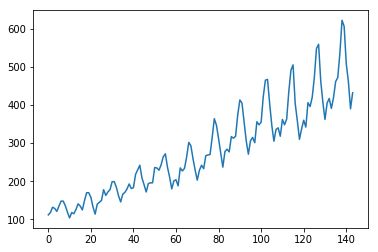

In [25]:
plt.plot(data_csv)

#### 数据预处理

In [26]:
data_csv = data_csv.dropna()
dataset = data_csv.values
dataset = dataset.astype('float32')
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))

接着进行数据集的创建

想通过前面几个月的流量来预测当月的流量，比如希望通过前两个月的流量来预测当月的流量，我们可以将前两个月的流量当做输入，当月的流量当做输出。

同时我们需要将我们的数据集分为训练集和测试集，通过测试集的效果来测试模型的性能，这里我们简单的将前面几年的数据作为训练集，后面两年的数据作为测试集。

In [27]:
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [28]:
# 创建好输入输出
data_X, data_Y = create_dataset(dataset)

#### 划分训练集和测试集，70% 作为训练集

In [30]:
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

最后，我们需要将数据改变一下形状，因为 RNN 读入的数据维度是 (seq, batch, feature)，所以要重新改变一下数据的维度，这里只有一个序列，所以 batch 是 1，而输入的 feature 就是我们希望依据的几个月份，这里我们定的是两个月份，所以 feature 就是 2.

In [31]:
import torch

train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)

In [32]:
from torch import nn
from torch.autograd import Variable

这里定义好模型，模型的第一部分是一个两层的 RNN，每一步模型接受两个月的输入作为特征，得到一个输出特征。接着通过一个线性层将 RNN 的输出回归到流量的具体数值，这里我们需要用 view 来重新排列，因为 nn.Linear 不接受三维的输入，所以我们先将前两维合并在一起，然后经过线性层之后再将其分开，最后输出结果。

#### 定义模型

In [33]:
class lstm_reg(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(lstm_reg, self).__init__()
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # rnn
        self.reg = nn.Linear(hidden_size, output_size) # 回归
        
    def forward(self, x):
        x, _ = self.rnn(x) # (seq, batch, hidden)
        s, b, h = x.shape
        x = x.view(s*b, h) # 转换成线性层的输入格式
        x = self.reg(x)
        x = x.view(s, b, -1)
        return x

In [34]:
net = lstm_reg(2, 4)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

定义好网络结构，输入的维度是 2，因为我们使用两个月的流量作为输入，隐藏层的维度可以任意指定，这里我们选的 4

#### 开始训练

In [36]:
for e in range(1000):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    # 前向传播
    out = net(var_x)
    loss = criterion(out, var_y)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 100 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.data))

Epoch: 100, Loss: 0.00438
Epoch: 200, Loss: 0.00385
Epoch: 300, Loss: 0.00359
Epoch: 400, Loss: 0.00327
Epoch: 500, Loss: 0.00273
Epoch: 600, Loss: 0.00158
Epoch: 700, Loss: 0.00120
Epoch: 800, Loss: 0.00122
Epoch: 900, Loss: 0.00109
Epoch: 1000, Loss: 0.00105


### 用训练好的模型去预测后面的结果

In [ ]:
net = net.eval() # 转换成测试模式

In [ ]:
data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = net(var_data) # 测试集的预测结果

In [ ]:
# 改变输出的格式
pred_test = pred_test.view(-1).data.numpy()

In [ ]:
# 画出实际结果和预测的结果
plt.plot(pred_test, 'r', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')

In [ ]:
这里蓝色的是真实的数据集，红色的是预测的结果，我们能够看到，使用 lstm 能够得到比较相近的结果，预测的趋势也与真实的数据集是相同的，因为其能够记忆之前的信息，而单纯的使用线性回归并不能得到较好的结果，从这个例子也说明了 RNN 对于序列有着非常好的性能。

In [ ]:
**小练习：试试改变隐藏状态输出的特征数，看看有没有什么改变，同时试试使用简单的线性回归模型，看看会得到什么样的结果**

# RNN(分类)

In [15]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision      # 数据库模块
from torch.autograd import Variable

In [16]:
torch.manual_seed(1)    # reproducible
 
# Hyper Parameters超参数
EPOCH = 1           # 训练整批数据多少次, 为了节约时间, 我们只训练一次
BATCH_SIZE = 64
TIME_STEP = 28      # rnn 时间步数 / 图片高度
INPUT_SIZE = 28     # rnn 每步输入值 / 图片每行像素
LR = 0.01           # learning rate
DOWNLOAD_MNIST = False  # 如果你已经下载好了mnist数据就写上 Fasle
 
 
# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='./mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)
 
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
 
# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
 
# 为了节约时间, 我们测试时只测试前2000个
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [17]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
 
        self.rnn = nn.LSTM(     # LSTM 效果要比 nn.RNN() 好多了
            input_size=INPUT_SIZE,      # 图片每行的数据像素点
            hidden_size=64,     # rnn hidden unit
            num_layers=1,       # 有几层 RNN layers
            batch_first=True,   # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
        )
 
        self.out = nn.Linear(64, 10)    # 输出层
 
    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)   LSTM 有两个 hidden states, h_n 是分线, h_c 是主线
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None 表示 hidden state 会用全0的 state
 
        # 选取最后一个时间点的 r_out 输出
        # 这里 r_out[:, -1, :] 的值也是 h_n 的值
        out = self.out(r_out[:, -1, :])
        return out

In [19]:
rnn = RNN()
print (rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [20]:
rnn = RNN().cuda()

RuntimeError: CUDA error: unknown error

In [11]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

In [12]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, b_y) in enumerate(train_loader):   # gives batch data
        x = Variable(x)
        b_y = Variable(b_y)
        b_x = x.view(-1, 28, 28)   # reshape x to (batch, time_step, input_size)
 
        output = rnn(b_x)               # rnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
 
 
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


# RNN（分类）GPU

In [13]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision      # 数据库模块
from torch.autograd import Variable
import time

In [8]:
time_start=time.time()
torch.manual_seed(1)    # reproducible
 
# Hyper Parameters
EPOCH = 1           # 训练整批数据多少次, 为了节约时间, 我们只训练一次
BATCH_SIZE = 64
TIME_STEP = 28      # rnn 时间步数 / 图片高度
INPUT_SIZE = 28     # rnn 每步输入值 / 图片每行像素
LR = 0.01           # learning rate
DOWNLOAD_MNIST = False  # 如果你已经下载好了mnist数据就写上 Fasle

# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='./mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)

test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
 
# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# 为了节约时间, 我们测试时只测试前2000个
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000].cuda()/255.   
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000].cuda()

RuntimeError: CUDA error: unknown error

In [15]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
 
        self.rnn = nn.LSTM(     # LSTM 效果要比 nn.RNN() 好多了
            input_size=INPUT_SIZE,      # 图片每行的数据像素点
            hidden_size=64,     # rnn hidden unit
            num_layers=1,       # 有几层 RNN layers
            batch_first=True,   # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
        )
 
        self.out = nn.Linear(64, 10)    # 输出层
 
    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)   LSTM 有两个 hidden states, h_n 是分线, h_c 是主线
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None 表示 hidden state 会用全0的 state,表示没有第一个h
 
        # 选取最后一个时间点的 r_out 输出
        # 这里 r_out[:, -1, :] 的值也是 h_n 的值
        out = self.out(r_out[:, -1, :])  #最后一个时刻的选取
        return out
 
rnn = RNN()
rnn.cuda()    #模型使用了cuda()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [16]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

In [17]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, b_y) in enumerate(train_loader):   # gives batch data
        x = Variable(x).cuda()
        b_y = Variable(b_y).cuda()     #训练数据使用了cuda（）
        b_x = x.view(-1, 28, 28)   # reshape x to (batch, time_step, input_size)
 
        output = rnn(b_x)               # rnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].cpu().data.numpy().squeeze()   #得转换为cpu（）,不然出现：can't convert CUDA tensor to numpy (it doesn't support GPU arrays). Use .cpu() to move the tensor to host memory first.
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

time_end=time.time()
print('time cost',time_end-time_start,'s')

[7 2 1 0 4 1 4 9 5 9] prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], device='cuda:0') real number
time cost 261.020117521286 s


# RNN（回归）

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
torch.manual_seed(1)    # reproducible
 
# Hyper Parameters
TIME_STEP = 10      # rnn time step / image height
INPUT_SIZE = 1      # rnn input size / image width
LR = 0.02           # learning rate
DOWNLOAD_MNIST = False  # set to True if haven't download the data

In [3]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
 
        self.rnn = nn.RNN(  # 这回一个普通的 RNN 就能胜任
            input_size=1,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # 有几层 RNN layers
            batch_first=True,   # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)
 
    def forward(self, x, h_state):  # 因为 hidden state 是连续的, 所以我们要一直传递这一个 state
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out, h_state = self.rnn(x, h_state)   # h_state 也要作为 RNN 的一个输入
 
        outs = []    # 保存所有时间点的预测值
        for time_step in range(r_out.size(1)):    # 对每一个时间点计算 output
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state
 
 
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [5]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all rnn parameters
loss_func = nn.MSELoss()
 
h_state = None   # 要使用初始 hidden state, 可以设成 None
 
plt.figure(1, figsize=(12, 5))
plt.ion()

<Figure size 864x360 with 0 Axes>

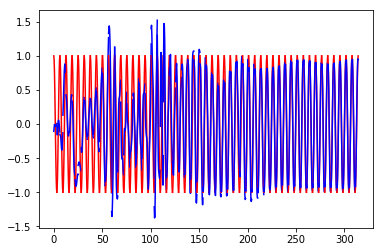

KeyboardInterrupt: 

In [6]:
for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time steps
    # sin 预测 cos
    steps = np.linspace(start, end, 10, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)
 
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
 
    x = Variable(x)
    y = Variable(y)
 
    prediction, h_state = rnn(x, h_state)   # rnn 对于每个 step 的 prediction, 还有最后一个 step 的 h_state
    # !!  下一步十分重要 !!
    h_state = Variable(h_state.data)  # 要把 h_state 重新包装一下才能放入下一个 iteration, 不然会报错
 
    loss = loss_func(prediction, y)     # cross entropy loss
    optimizer.zero_grad()               # clear gradients for this training step
    loss.backward()                     # backpropagation, compute gradients
    optimizer.step()                    # apply gradients
 
    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
plt.draw()
plt.pause(0)